In [1]:
#importing the relavent Liabraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
sb.set()

In [2]:
data = pd.read_csv('diabetes.csv') #importing Dataset

In [3]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
data.describe()
# None of the values are empty - Thats Great!

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


C:\Users\Suyash\miniconda33\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Outcome', ylabel='Density'>

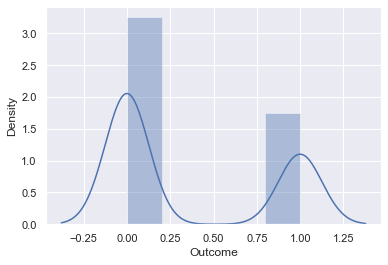

In [5]:
sb.distplot(data['Outcome'])
# As we can see the distribution of the diabetic and non Diabetic patients in our dataset is un-even

Text(0, 0.5, 'People')

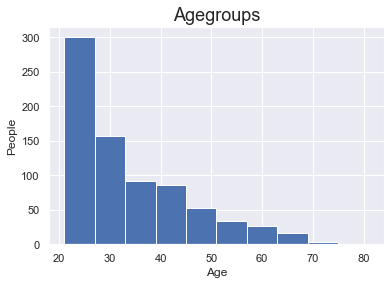

In [6]:
plt.hist(data['Age'])
plt.title('Agegroups', size = 18)
plt.xlabel('Age',size = 12)
plt.ylabel('People',size = 12)
#looking at the age Group Distribution of our dataset to gain more insight

Text(0, 0.5, 'Diabetic People')

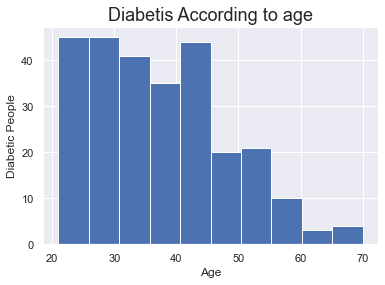

In [7]:
new_data = data
filter = new_data['Outcome'] == 1
plt.hist(new_data['Age'].where(filter))
plt.title('Diabetis According to age', size = 18)
plt.xlabel('Age',size = 12)
plt.ylabel('Diabetic People',size = 12)
#Looking at the distribution of Diabetic persorns According to agegroup

In [8]:
data.columns.values

array(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype=object)

In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
nonull = ['Glucose', 'BloodPressure', 'SkinThickness',
       'Insulin', 'BMI']

In [11]:
for column in nonull:
    data[column] = data[column].replace(0,np.NaN)
    mean= data[column].mean(skipna=True)
    data[column] = data[column].replace(np.NaN,mean)
#as we can see in Dataset Multiple values are 0 which should not be the case Like Blood pressure and Glucose cant be zero.
#so replacing the 0 values with the average value of the feature.

In [12]:
x = data.drop(['Outcome'],axis =1)
#Independent Variables

In [13]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47


In [14]:
y = data['Outcome']
#Dependent Variable

In [15]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42, test_size =0.25)
#Spliting Dataset Into Train Test Parts

In [17]:
sc = StandardScaler()

In [18]:
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.fit_transform(x_test)
#Scaling the Train Values so the classification can be more effective and to bridge the value difference between Features.

In [19]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
357,13,129.0,72.405184,30.00000,155.548223,39.900000,0.569,44
73,4,129.0,86.000000,20.00000,270.000000,35.100000,0.231,23
352,3,61.0,82.000000,28.00000,155.548223,34.400000,0.243,46
497,2,81.0,72.000000,15.00000,76.000000,30.100000,0.547,25
145,0,102.0,75.000000,23.00000,155.548223,32.457464,0.572,21
...,...,...,...,...,...,...,...,...
71,5,139.0,64.000000,35.00000,140.000000,28.600000,0.411,26
106,1,96.0,122.000000,29.15342,155.548223,22.400000,0.207,27
270,10,101.0,86.000000,37.00000,155.548223,45.600000,1.136,38
435,0,141.0,72.405184,29.15342,155.548223,42.400000,0.205,29


## Support vector Machine Algorithm

In [20]:
svc  = SVC(kernel = 'linear', random_state = 0)
#setting svc kernel to lenear

In [21]:
svc.fit(x_train_scaled,y_train)

SVC(kernel='linear', random_state=0)

In [22]:
prediction = svc.predict(x_test_scaled)

In [23]:
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [24]:
predictions = pd.DataFrame()

In [25]:
predictions['Actual Result'] = y_test
predictions['Predicted Result'] = prediction

In [26]:
predictions

,Actual Result,Predicted Result
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
...,...,...
554,0,0
319,1,1
594,0,0
6,1,0


In [27]:
from sklearn.metrics import confusion_matrix
#Creating confusion metrix

In [28]:
cm = confusion_matrix

In [29]:
cm_df = cm(y_test,prediction)

In [30]:
pred = pd.DataFrame(cm_df)

In [31]:
pred

,0,1
0,103,20
1,30,39


C:\Users\Suyash\miniconda33\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

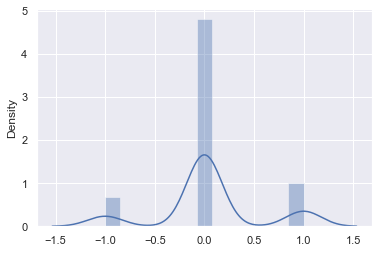

In [32]:
sb.distplot(predictions['Actual Result']-predictions['Predicted Result'] )
#as we can see the error term is Fairly normally distribute - thats Good!

## Logistic Regression Algorithm

In [33]:
from sklearn.linear_model import LogisticRegression 
# importing library

In [34]:
log_reg = LogisticRegression()

In [35]:
log_reg.fit(x_train_scaled,y_train)

LogisticRegression()

In [36]:
log_reg_pred = log_reg.predict(x_test_scaled)

In [37]:
Log_reg_predictions = pd.DataFrame()

In [38]:
Log_reg_predictions['Actual Result'] = y_test
Log_reg_predictions['Predicted Result'] = log_reg_pred

In [39]:
Log_reg_predictions

,Actual Result,Predicted Result
668,0,0
324,0,0
624,0,0
690,0,0
473,0,0
...,...,...
554,0,0
319,1,1
594,0,0
6,1,0


In [40]:
log_reg_cm_df = cm(y_test,log_reg_pred)

In [41]:
log_pred = pd.DataFrame(log_reg_cm_df)

In [42]:
log_pred

,0,1
0,104,19
1,29,40


C:\Users\Suyash\miniconda33\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

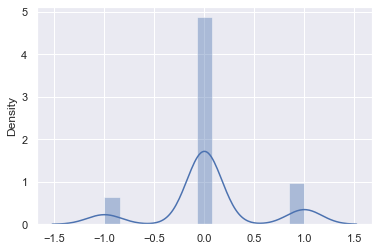

In [43]:
sb.distplot(Log_reg_predictions['Actual Result']-Log_reg_predictions['Predicted Result'] )

In [44]:
from sklearn.metrics import accuracy_score 

In [45]:
svm_score = accuracy_score(y_test, prediction) 
svm_score

0.7395833333333334

In [46]:
log_reg_score = accuracy_score(y_test,log_reg_pred) 
log_reg_score

0.75

### Conclusion:
As we can see the both algorithms performed quite well in classification with above 73 % accuracy.

Error Terms for both the classifications if normally Distributed.

Logistic Regression Performed Slightly better than SVM.

Agegroup distribution of diabetic patients provide us more insights on the dataset.

### Improvements:
Number of observations can be increased so that algorithm can train on more nuances.
